# 2.1 基于搜索的问题求解

<center><video src="http://files.momodel.cn/search_problem.mp4" controls="controls" width=800px></center>

现实世界中许多问题都可以通过搜索的方法来求解，例如设计最佳出行路线或是制订合理的课程表。当给定一个待求解问题后，搜索算法会按照事先设定的逻辑来自动寻找符合求解问题的答案，因此一般可将搜索算法称为问题求解智能体。

<img src="http://imgbed.momodel.cn//20200110155424.png" width=500>

## 2.1.1 搜索算法基本概念

<center><video src="http://files.momodel.cn/search_basic_concept.mp4" controls="controls" width=800px></center>

我们把书中的公交换乘的问题，转为无向图中的的路径寻找问题。无向图指的是边没有方向的图。

首先，我们画出如下的无向图。该无向图中有 A，B，C，D，E，F，G 七个节点，其中 A 是起点， G 是目标点。

点与点之间的连线称为边，边可以有权重，可以代表点与点之间的距离或者从一个点转移到另一个点需要花费的代价。

下面我们先创建一个图。

In [2]:
# 首先导入必要的包
from search import SearchGraph
import collections
import matplotlib.pyplot as plt
import collections
from IPython import display
import networkx as nx
import numpy as np
import time

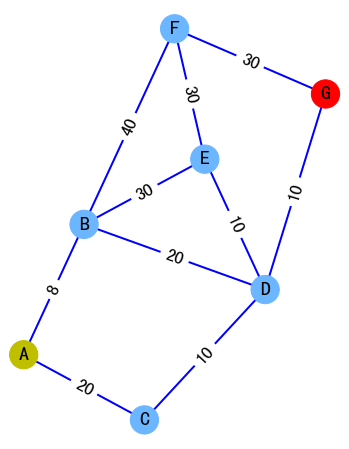

In [3]:
# 定义节点列表
node_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# 定义边及权重列表
weighted_edges_list = [('A', 'B', 8), ('A', 'C', 20),
                       ('B', 'F', 40), ('B', 'E', 30),
                       ('B', 'D', 20), ('C', 'D', 10), 
                       ('D', 'G', 10), ('D', 'E', 10),
                       ('E', 'F', 30), ('F', 'G', 30)]
# 定义绘图中各个节点的坐标
nodes_pos = {"A": (1, 1), "B": (3, 3), "C": (5, 0), "D": (9, 2),
             "E": (7, 4), "F": (6,6),"G": (11,5)}

# 绘制无向图
g = SearchGraph(node_list, weighted_edges_list, 'A', 'G', max_depth=3, nodes_pos = nodes_pos )
g.show_graph()

观察上图，可以看到从起点 A 到目标点 G 距离最短的路径是 A -> B -> D  -> G，其距离是 38，我们可以设计一个计算机程序，按照既定的规则，从起点 A 出发，不断尝试从一个节点移动到下一个节点，直到抵达目标点 G。

**想一想**

搜索算法四个重要的概念分别是什么？

**动手练**

更改下面的代码，设置一条路径并查看，并结合此图说明搜索算法的四个重要概念。

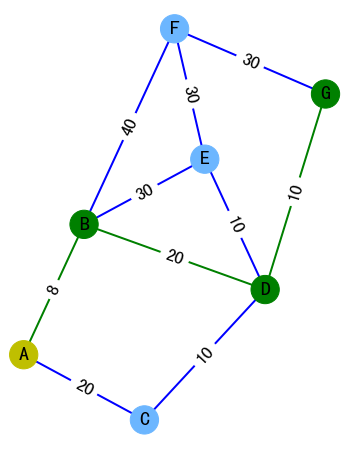

In [4]:
g.show_graph(this_path="ABDG")

## 2.1.2 搜索算法

<center><video src="http://files.momodel.cn/search_tree.mp4" controls="controls" width=800px></center>

搜索算法就是不断从某一状态转移到下一状态，直至到达终止状态为止。

**想一想**

搜索树是什么？

如何构造搜索树？

思考一下，路径搜索能出现回路吗？

在搜索树中能够扩展的节点需满足什么条件？

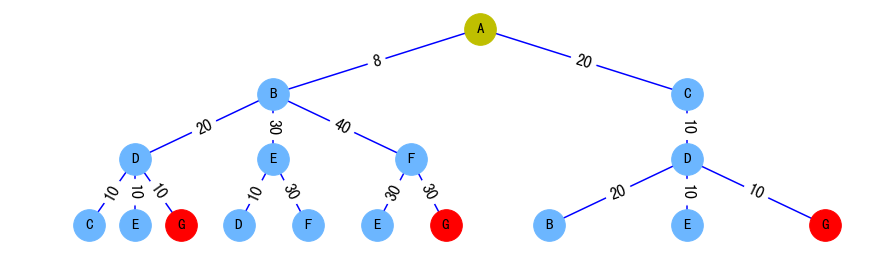

In [5]:
# 查看搜索树
g.show_search_tree()

## 2.1.3 深度优先搜索和广度优先搜索

<center><video src="http://files.momodel.cn/search_dfs_bfs.mp4" controls="controls" width=800px></center>

<img src="http://imgbed.momodel.cn//20200110151426.png" width=600>

**深度优先搜索**

In [ ]:
g.animation_search_tree('dfs')

**广度优先搜索**

In [ ]:
g.animation_search_tree('bfs')

**想一想**

对于一个搜索问题，只要存在答案（即从初始节点到终止节点存在满足条件的一条路径），那么深度优先搜索和广度优先搜索都能找到一个答案吗？找到的答案一定是路径最短的吗？

### 扩展内容
** 深度优先搜索 dfs ** 基础代码解读

```
def iter_dfs(G, start, target):
    '''
    深度优先搜索
    :param G: 字典，存储每个点的相邻点
    :param start: 初始点
    :param target: 目标点
    :return:
    '''

    # 定义已访问的点的集合
    S = set()
    # 定义一个待访问点的列表
    Q = []
    # 把初始点放进列表中
    Q.append(start)
    while Q:
        # 只要带访问的列表不为空，那么从列表中拿取最后一个元素，也就是一个点，记作 u
        u = Q.pop()
        # 如果当前点是目标点，则结束查找
        if u == target:
            break
        # 如果该点已经被访问了，则跳过此点
        if u in S:
            continue
        # 访问此点，将点加入已访问点的结合 S 中
        S.add(u)
        # 将点 u 相邻的点放入待访问的列表中
        Q.extend(G[u])
```

## 2.1.4 启发式搜索

<center><video src="http://files.momodel.cn/search_greedy.mp4" controls="controls" width=800px></center>

**想一想**

能否在搜索过程中利用问题的定义以外的辅助信息？

**辅助信息：各个节点到目标节点G的直线距离**

|站点|A|B|C|D|E|F|G|
|--|--|--|--|--|--|--|--|
|距离|30|20|19|10|5|25|0|

如果每下一站都选最近的，那么称之为“贪婪”。

利用下面的代码查看贪婪最佳优先算法搜索过程：

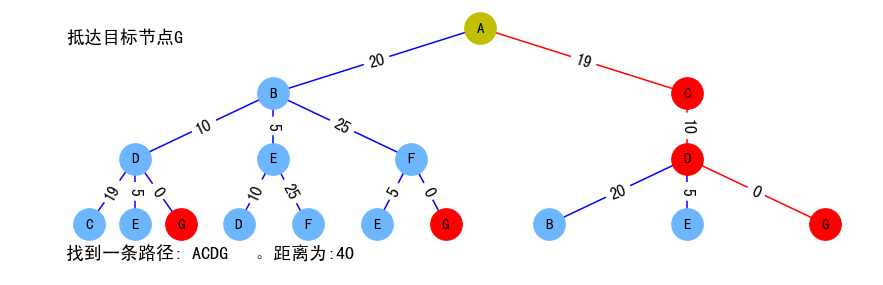

In [6]:
# 为搜索算法提供辅助信息
g.help_info = {'A': 30, 'B': 20, 'C': 19, 'D':10, 'E':5, 'F':25, 'G': 0}
# 动态演示贪婪搜索
g.animation_search_tree('greedy')

**想一想**

“贪婪”机制下找到的最佳路径是什么呢？它是最短路径吗？为什么会产生这样的搜索结果？


另一种启发式搜索算法—— A* 算法克服了贪婪算法的不足。

<center><video src="http://files.momodel.cn/search_a_star.mp4" controls="controls" width=800px></center>

A\*算法搜索过程：

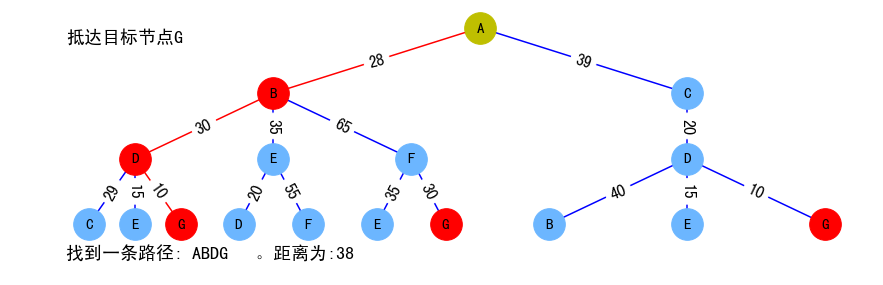

In [10]:
# 为搜索算法提供辅助信息
g.help_info = {'A': 30, 'B': 20, 'C': 19, 'D':10, 'E':5, 'F':25, 'G': 0}
# 动态演示 A* 算法
g.animation_search_tree('a_star')

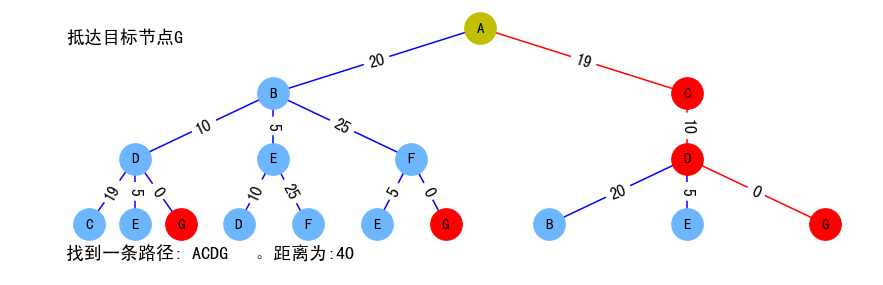

In [9]:
# 可以调整辅助信息的比重
# 当只考虑额外信息时，即 origin_info_weight 设置为 0 的时候，A* 算法退化为贪婪算法。
g.animation_search_tree('a_star',help_info_weight=1, origin_info_weight=0)

**想一想**

在实际中，A\* 算法的性能表现一定很优秀吗？如果启发函数设计的不好怎么办？

####  思考与练习

下图是一张线路示意图。

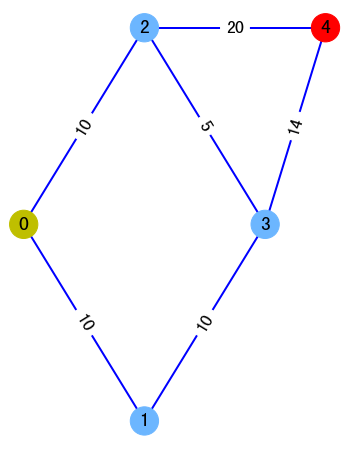

In [12]:
node_list = ["0","1","2","3","4"]
weighted_edges_list = [("0","1",10), ("0","2",10),
                       ("1", "3", 10), ("2", "3", 5), 
                       ("2", "4", 20), ("3", "4", 14),
                       ("3", "2", 5)]
nodes_pos = {"0":(1,7),"1":(5,1),"2":(5,13),"3":(9,7),"4":(11,13)}
h_graph = SearchGraph(node_list, weighted_edges_list, "0", "4", 5, nodes_pos)
h_graph.show_graph()


如果使用深度优先搜索求状态 0 到状态 4 的一条路径，我们可以用下表来模拟搜索过程。注意：在下表中，结点的深度定义为它对应路径中状态转移的次数，如果多个未访问结点的深度相同，那么在这个例子里算法优先选择状态编号大的节点。

|步骤|当前状态|当前未访问节点集合(用上划线标出了下一个扩展的节点)|
|:--:|:--:|:--|
|1|0|深度1：${0 -> 1,\overline{0 -> 2}}$|
|2|2|深度1：${0 -> 1}$ 深度2：$\underline{（1）}$|
|3|$\underline{（2）}$|找到路径：0 -> 2 -> 4|

**问题 1**：请仔细观察上表中各项内容的含义，根据深度优先搜素的思路，横线（1）和（2）处应该填写什么。

**答案 1**：（在此处填写你的答案。）

**问题 2**：找到的路径0->2->4是代价最小的吗？

**答案 2**：（在此处填写你的答案。）


## 扩展阅读
1. [Introduction to the A* Algorithm](https://www.redblobgames.com/pathfinding/a-star/introduction.html)
2. [游戏开发中的人工智能：A* 路径寻找算法](https://blog.csdn.net/Jurbo/article/details/75532885)
3. [A* Search Algorithm](https://www.101computing.net/a-star-search-algorithm/)
4. [A star Pathfinding A星寻路算法](https://www.bilibili.com/video/av32847834/)